# Binary Classification with a Deep Neural Network

Until now we have seen the binary logistic regression model which is a linear model and how it corresponds to ta neural network with no hidden layer. 
The power of deep learning comes from the hidden layers which allow the model to learn more complex patterns.

A binary classification neural network with a hidden layer is shown below:

```mermaid
graph LR
    A1["$$x_1$$"] -->|"$$w_{11}$$"| B1["$$\sigma(z_1)$$"]
    A1 -->|"$$w_{12}$$"| B2["$$\sigma(z_2)$$"]
    A1 -->|"$$w_{13}$$"| B3["$$\sigma(z_3)$$"]
    A2["$$x_2$$"] -->|"$$w_{21}$$"| B1
    A2 -->|"$$w_{22}$$"| B2
    A2 -->|"$$w_{23}$$"| B3
    B1 -->|"$$w^{h}_{1}$$"| C["$$\sigma(o)$$"]
    B2 -->|"$$w^{h}_{2}$$"| C
    B3 -->|"$$w^{h}_{3}$$"| C
```



Before we turn to the mathematical formulation of the model, let's explore its capabilities.

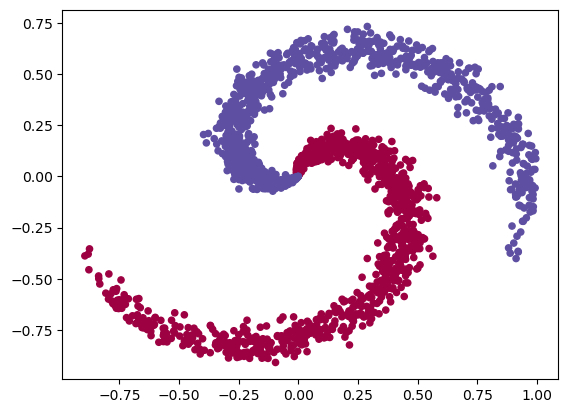

In [1]:
# Create a XOR dataset

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Number of samples per class
N = 1000
D = 2
K = 2

X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

# Plot the data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
plt.show()


In [2]:
# A linear model will not be able to separate the classes

# Train a linear classifier
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)
print('Accuracy: %.2f' % model.score(X, y))


Accuracy: 0.71


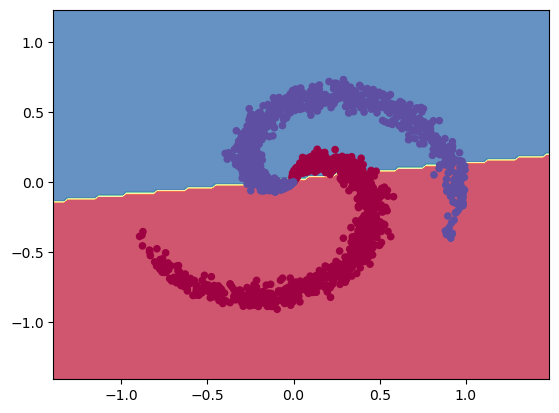

In [3]:
# Plot the predictions of the model

def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)

plt.figure()
plot_decision_boundary(model, X, y)
plt.show()

In [9]:
# Train a neural network using pytorch

import torch
import torch.nn as nn
import torch.optim as optim


# Convert the data to pytorch tensors
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).long()

# Define the model
model = nn.Sequential(
    nn.Linear(D, 10),
    nn.ReLU(),
    nn.Linear(10, K)
)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model

for epoch in range(1000):
    optimizer.zero_grad()
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print('Epoch %d, Loss: %.4f' % (epoch, loss.item()))

# Evaluate the model
y_pred = model(X_tensor).argmax(1)
accuracy = (y_pred == y_tensor).float().mean()
print('Accuracy: %.2f' % accuracy.item())

Epoch 0, Loss: 0.7173
Epoch 50, Loss: 0.3774
Epoch 100, Loss: 0.2262
Epoch 150, Loss: 0.1668
Epoch 200, Loss: 0.1372
Epoch 250, Loss: 0.1155
Epoch 300, Loss: 0.0983
Epoch 350, Loss: 0.0849
Epoch 400, Loss: 0.0735
Epoch 450, Loss: 0.0639
Epoch 500, Loss: 0.0568
Epoch 550, Loss: 0.0513
Epoch 600, Loss: 0.0469
Epoch 650, Loss: 0.0431
Epoch 700, Loss: 0.0396
Epoch 750, Loss: 0.0360
Epoch 800, Loss: 0.0331
Epoch 850, Loss: 0.0307
Epoch 900, Loss: 0.0286
Epoch 950, Loss: 0.0267
Accuracy: 0.99


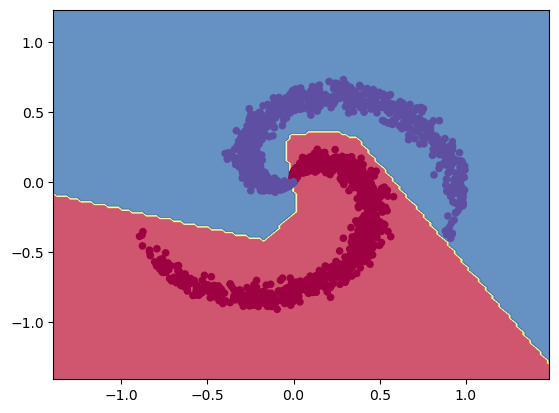

In [10]:
# Plot the decision boundary

def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_test = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    Z = model(X_test).argmax(1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)

plt.figure()
plot_decision_boundary(model, X, y)
plt.show()

The mathematical representation of the model is:

$$
\begin{align*}
z_1 &= w_{11}x_1 + w_{21}x_2 + b_1 \\
z_2 &= w_{12}x_1 + w_{22}x_2 + b_2 \\
z_3 &= w_{13}x_1 + w_{23}x_2 + b_3 \\
o &= w^{h}_{1}ReLU(z_1) + w^{h}_{2}ReLU(z_2) + w^{h}_{3}ReLU(z_3) + b^{h} \\
\hat{y} &= \sigma(o)
\end{align*}
$$

where $\sigma$ is the sigmoid function and serves as the activation function for the hidden layer and the output layer.

The usual loss function for binary classification is the binary cross-entropy loss that we have already seen in the binary logistic regression model. For a single observation (sample), the loss function is:

$$
\begin{align*}
L(y, \hat{y}) &= -y\log(\hat{y}) - (1-y)\log(1-\hat{y})
\end{align*}
$$


## Activation Functions

In this example we used the ReLU activation function for the hidden layer. The ReLU function is defined as:

$$
\begin{align*}
ReLU(x) = \max(0, x)
\end{align*}
$$

Other common activation functions are the sigmoid and the tanh functions. We already know the sigmoid function, it is defined as:

$$
\begin{align*}
\sigma(x) = \frac{1}{1 + e^{-x}}
\end{align*}
$$

The tanh function is defined as:

$$
\begin{align*}
tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
\end{align*}
$$

The tanh function is similar to the sigmoid function but it is zero-centered and has a higher output range.

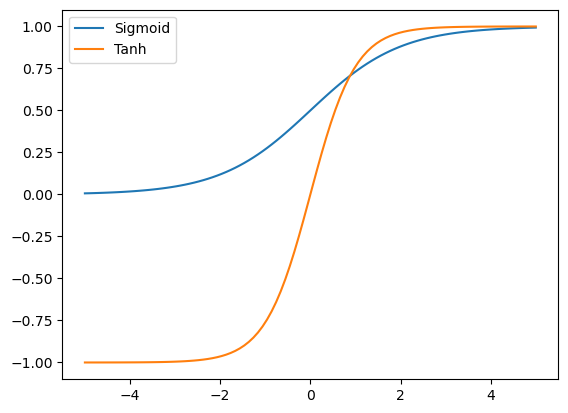

In [10]:
# Plot the sigmoid and the tanh functions

x = np.linspace(-5, 5, 100)
plt.figure()
plt.plot(x, 1 / (1 + np.exp(-x)), label='Sigmoid')
plt.plot(x, np.tanh(x), label='Tanh')
plt.legend()
plt.show()

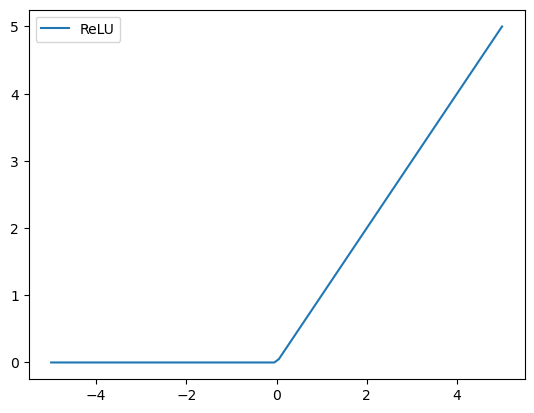

In [11]:
# Plot the ReLU function

plt.figure()
plt.plot(x, np.maximum(0, x), label='ReLU')
plt.legend()
plt.show()